# 第5章 : EMアルゴリズム
## KLダイバージェンス
### 数式の表記について
以下、確率変数$x$の確率密度が$p\left(x\right)$で表されるときの$f\left(x\right)$の期待値を
$$
\mathbb{E}_{p\left(x\right)} [ f\left(x\right)] := \int{f\left(x\right)p\left(x\right)dx}
$$
とかく。また、$p\left(x;\theta\right)をp_{\theta}\left(x\right)$とかく


### KLダイバージェンスとは
2つの確率分布を測る尺度に用いる。確率分布$p\left(x\right),q\left(x\right)$が与えられたときのKLダイバージェンスは、
$$
D_{KL} \left(p \parallel q \right) = \int p\left(x\right) \log{\frac{p\left(x\right)}{q\left(x\right)}dx}
$$
である。xが離散変数の場合は、
$$
D_{KL} \left(p \parallel q \right) = \sum p\left(x\right) \log{\frac{p\left(x\right)}{q\left(x\right)}dx}
$$
である。

このKLダイバージェンスには次の特性がある
- 2つの確率分布が異なるほど大きい値をとる
- 0以上の値をとり、2つの確率分布が同じ時のみ0になる
- 非対称な尺度であるため、$D_{KL}\left(p \parallel q \right) \neq D_{KL}\left(q \parallel p \right)$

### KLダイバージェンスと最尤推定の関係
真の確率分布$p_*\left(x\right)$があり、サンプルデータ$\{x^{\left(1\right)},x^{\left(2\right)},\cdots,x^{\left(N\right)}\}$を生成したとき、対数尤度は

$$
\log{\prod_{n=1}^{N}{p_{\theta}\left(x^{\left(n\right)}\right)}} = \sum_{n=1}^{N}\log p_{\theta}\left(x^{\left(n\right)}\right)
$$

とかけて、対数尤度を最大化するパラメータ$\theta$は

$$
\hat{\theta} = \argmax_{\theta}\sum_{n=1}^{N}{\log p_{\theta}\left(x^{\left(n\right)}\right)}
$$

である

ここで、この最尤推定の式をKLダイバージェンスを使って導出する

最尤推定の目的はパラメータ$\theta$を変更することで$p_{\theta}\left(x\right)$を真の確率分布$p_*\left(x\right)$に近づけることであり、これは次のKLダイバージェンスの最小化であると言える

$$
D_{KL}\left(p_* \parallel p_{\theta} \right) = \int p_* \left(x\right) \log \frac{p_* \left(x\right)}{p_{\theta}\left(x\right)dx}
$$

これは$p_*\left(x\right)$が未知であるから計算不可であるが、以下のモンテカルロ(Monte Carlo method)を使って近似する
### モンテカルロ法
$$
\begin{align}
\mathbb{E}_{p\left(x\right)} [ f\left(x\right)] &= \int{f\left(x\right)p\left(x\right)dx} \\
&\approx \frac{1}{N} \sum_{n=1}^{N}{f\left(x^{\left(n\right)}\right)} \quad \left(x^{\left(n\right)} \sim p_*\left(x\right)\right)
\end{align}
$$


いま、$f\left(x\right) = \log \frac{p_*\left(x\right)}{p_{\theta}\left(x\right)}$であるから、



$$
\begin{align}
D_{KL}\left(p_* \parallel p_{\theta} \right) &= \int p_* \left(x\right) \log \frac{p_* \left(x\right)}{p_{\theta}\left(x\right)dx} \\
&\approx \frac{1}{N}\sum_{n=1}^{N} \log {\frac{p_* \left(x^{\left(x\right)}\right)}{p_{\theta}\left(x^{\left(n\right)}\right)}} \quad \left(x^{\left(n\right)} \sim p_*\left(x\right)\right) \\
&= \frac{1}{N} \sum_{n=1}^{N}{\left(\log p_*\left(x^{\left(n\right)}\right) - \log p_{\theta}\left(x^{\left(n\right)}\right) \right)}
\end{align}
$$

このとき、

$$
\begin{align}
\argmin_{\theta} D_{KL}\left(p_* \parallel p_{\theta}\right) &\approx \argmin_{\theta} \left(-\frac{1}{N}\sum_{n=1}^{N}{\log p_{\theta}\left(x_n\right)} \right) \\
&= \argmax_{\theta}  \sum_{n=1}^{N}{\log p_{\theta}\left(x_n\right)}
\end{align}
$$

よって、

$$
\argmin_{\theta} D_{KL} \left(p_* \parallel p_{\theta}\right) \approx \argmax_{\theta} \sum_{n=1}^{N}{\log p_{\theta} \left(x_n \right)}
$$

となりKLダイバージェンスの最小化から最尤推定に帰着する

## EMアルゴリズム
最尤推定が解析的に解けない潜在変数を持つモデルにたいして使われるものである。(GMMはカテゴリカル分布で$z=k$という潜在変数$z$があるためEMアルゴリズムはGMMにも使える)

### 潜在変数をもつモデル
潜在変数を持つモデルは、確率変数$x$、潜在変数$z$、パラメータ$\theta$を用いて
$$
\log p_{\theta}\left(x \right) = \log {\sum_{z}{p_{\theta}\left(x,z\right)}}
$$
とかける。連続変数の場合は$\sum$が$\int$になるだけである。

いま、サンプル$\mathcal{D} = \{x^{\left(1\right)},x^{\left(2\right)},\cdots,x^{\left(N\right)}\}$が得られた時を考える。このときの対数尤度は
$$
\begin{align}
\log p_{\theta} \left( \mathcal{D} \right) &= \log \left( p \left( x^{\left(1\right)} \right) , p \left( x^{\left(2\right)} \right),\cdots, p \left( x^{\left(N\right)} \right) \right) \\
&= \sum_{n=1}^{N}{\log \sum_{z^{\left(n\right)}}{p_{\theta}\left(x^{\left(n\right)},z^{\left(n\right)}\right)}}
\end{align}
$$
とかける。前章でやったとおり、この対数尤度の最大化は解析的に解けない。そこで、EMアルゴリズムはこのlog-sumの形をsum-logの形に変換する。

まず、$p_{\theta}\left(x\right)$に対して$q\left(z\right)$を用いて

$$
\begin{align}
\log p_{\theta} \left(x \right) & \log \frac{p_{\theta}\left(x, z\right)}{p_{\theta}\left(z | x \right)} \\
&= \log \frac{p_{\theta}\left(x, z\right)}{p_{\theta}\left(z | x \right)} \frac{q\left(z\right)}{q\left(z\right)} \\
&= \log \frac{p_{\theta}\left(x,z\right)}{q\left(z\right)} + \log \frac{q\left(z\right)}{p_{\theta}\left(z|x\right)}
\end{align}
$$

と変形する。これを用いて、

$$
\begin{align}
\log p_{\theta}(x) &= \log p_{\theta}(x) \sum_z q(z) \quad \left(\because \sum_{z}q\left(z\right)=1\right)\\
&= \sum_z q(z) \log p_{\theta}(x) \\
&= \sum_z q(z) \left( \log \frac{p_{\theta}\left(x,z\right)}{q\left(z\right)} + \log \frac{q\left(z\right)}{p_{\theta}(z|x)} \right)\\
&= \sum_z q(z) \log \frac{p_{\theta}(x,z)}{q(z)} + \underbrace{\sum_z q(z) \log \frac{q(z)}{p_{\theta}(z|x)}}_{\text{KL ダイバージェンス}} \\
&= \sum_z q(z) \log \frac{p_{\theta}(x,z)}{q(z)} + D_{KL}(q(z) \parallel p_{\theta}(z|x))
\end{align}
$$

とかける

### ELBO
ここで、KLダイバージェンスは0以上であるから
$$
\begin{align}
\log p_{\theta}(x) &= \sum_z q(z) \log \frac{p_{\theta}(x, z)}{q(z)} + D_{KL}(q(z) \parallel p_{\theta}(z|x)) \\
&\geq \sum_z q(z) \log \frac{p_{\theta}(x, z)}{q(z)}
\end{align}
$$
となる。ここの第一項はELBO(Evidence Lower Bound)(エビデンスの下界)(エビデンスは対数尤度の別名)と呼ばれる。

以降、
$$
{\rm{ELBO}} \left(x;q,\theta\right) = \sum_{z}{q\left(z\right)}\log \frac{p_\theta\left(x,z\right)}{q\left(z\right)}
$$
とする。${\rm{ELBO}} \left(x;q,\theta\right) $の特徴として以下がある。
- 対数尤度の下界
- sum-logの形になっていて解析しやすい
そのため、対数尤度を最大化するのではなく、このELBOを最大化する。

## EMアルゴリズム
${\rm{ELBO}} \left(x;q,\theta\right)$には2つのパラメータ$q\left(z\right), \theta$がある。片方を固定してもう片方のパラメータを固定するということを繰り返して最適解を求める。

まず、$\theta = \theta_{old}$として$\theta$をまずは固定する。
このとき、
$$
\log p_{\theta}\left(x\right) = {\rm{ELBO}} \left(x;q,\theta\right)  + D_{KL}\left(q\left(z\right) \parallel p_{\theta}\left(z | x \right)\right)
$$
より、$q\left(z|\right)$の更新式は$q\left(z\right)=p_{\theta_{old}}\left(z | x\right)$とかける。(KLダイバージェンスを0にするのが最適であるため)

この更新は、EMアルゴリズムのEステップ(Expectation Value : 期待値)と呼ばれる。由来としては、この更新後のELBOが期待値として表されるからである。

$$
\begin{align}
\mathrm{ELBO}(x; q = p_{\mathrm{old}}(z \mid x), \theta) &= \sum_{z} p_{\theta_{\mathrm{old}}}(z \mid x) \log  \frac{p_{\theta}(x, z)}{ \log p_{\theta_{\mathrm{old}}}(z \mid x)} \\
&= \mathbb{E}_{p_{\theta_{\mathrm{old}}}(z \mid x)} \left[ \log \frac{p_{\theta}(x, z)}{p_{\theta_{\mathrm{old}}}(z \mid x)} \right]
\end{align}
$$

続いて、このELBOに対して$\theta$の最適化を行うが、この式の形がsum-logの形になっているため解析的に解ける。これはMステップ(Maximization)と呼ばれる。

以上のEステップとMステップを値が収束するまで繰り返す。
### 複数データへの拡張
$N$個の観測データ$x^{(1)}, x^{(2)}, \ldots, x^{(N)}$に対してEMアルゴリズムを拡張する。各データに対応した任意の確率分布$q^{(1)}, q^{(2)}, \ldots, q^{(N)}$を用意する。このとき対数尤度とELBOの関係は
$$
\begin{align}
\sum_{n=1}^N \log p_\theta (x^{(n)}, z^{(n)})
&\geq \sum_{n=1}^N \mathrm{ELBO}(x^{(n)}; q^{(n)}, \theta) \\
&= \sum_{n=1}^N \sum_{z^{(n)}} q^{(n)}(z^{(n)}) \log \frac{p_\theta(x^{(n)}, z^{(n)})}{q^{(n)}(z^{(n)})} \\
\end{align}
$$
となる。

このとき、EMアルゴリズムは次のようにまとめられる。

#### 1. Eステップ : $\{ q^{(1)}, q^{(2)}, \ldots, q^{(N)} \}$の更新($\theta$は固定)
- 各$n$に対して、$ q^{(n)}(z) = p_\theta (z | x^{(n)})$とする。
#### 2. Mステップ : $\theta$の更新($\{ q^{(1)}, q^{(2)}, \ldots, q^{(N)} \}$は固定)
- $\sum_{n=1}^{N}{\mathrm{ELBO}\left(x^{(n)};q^{(n)},\theta\right)}$が最大に成る$\theta$を解析的に求める
#### 3. 終了判定 : 対数尤度の平均を計算して前回の対数尤度と比較する
- $\frac{1}{N}\sum_{n=1}^{N}{\log p\left(x^{(n)};\theta\right)}$

### EMアルゴリズムにおける対数尤度の単調増加性
このEMアルゴリズムの1回の更新において次の対数尤度の単調増加性が成り立つ。
$$
\log p\left(x; \theta_{\mathrm{new}}\right) \geq \log \left(x;\theta_{\mathrm{old}}\right)
$$
これを証明する。

まずはEステップにおいて$q_{\mathrm{old}}\left(z\right) = p_{\theta{\mathrm{old}}}\left(z | x\right)$で更新したとき、対数尤度とELBOが一致するため、
$$
\log p \left(x; \theta_{\mathrm{old}}\right) = \mathrm{ELBO} \left(x; q_{\mathrm{old}}, \theta_{\mathrm{old}}\right)
$$
が成り立つ。Mステップでは、上の式の右辺を最大化して$\theta_{\mathrm{new}}$を得るため、
$$
\mathrm{ELBO}\left(x;q_{\mathrm{old}}, \theta_{\mathrm{new}}\right) \geq \mathrm{ELBO}\left(x;q_{\mathrm{old}}, \theta_{\mathrm{old}}\right) 
$$
が成り立つ。さらに次のEステップでは、$q_{\mathrm{new}}(z) = p_{\theta_{\mathrm{new}}}\left(z | x \right)$で更新するため、
$$
\log p \left(x; \theta_{\mathrm{new}}\right) = \mathrm{ELBO}\left(x;q_{\mathrm{new}},\theta_{\mathrm{new}}\right) \geq \mathrm{ELBO}\left(x;q_{\mathrm{old}},\theta_{\mathrm{new}}\right)
$$
以上3つの式より、
$$
\begin{align}
\log p \left(x; \theta_{\mathrm{new}}\right) &\geq \mathrm{ELBO}\left(x; q_{\mathrm{old}},\theta_{\mathrm{new}}\right) \\
&\geq \mathrm{ELBO}\left(x; q_{\mathrm{old}}, \theta_{\mathrm{old}}\right) \\
&= \log p \left(x; \theta_{\mathrm{old}}\right)
\end{align}
$$

## GMMとEMアルゴリズム

EMアルゴリズムをGMMの確率分布に適用して、Mステップでは$\mu,\Sigma$については最尤推定の時と同じように解けて、$\phi$についてはラグランジュの未定乗数法で解ける
### Eステップ
各$n,k$に対して次の値を計算する
$$
q^{(n)}\left(k\right) = \frac{\phi_k \mathcal{N}\left(\boldsymbol{x}^{(n)};\boldsymbol{\mu}_k,\boldsymbol{\Sigma}_k\right)}{\sum_{j=1}^{K}{\phi_j \mathcal{N}\left(\boldsymbol{x}^{(n)}; \boldsymbol{\mu}_j, \boldsymbol{\Sigma}_j\right)}}
$$

### Mステップ
各$k$に対して次の値を計算する
$$
\begin{align}
\phi_k &= \frac{1}{N}\sum_{n=1}^{N}{q^{(n)}\left(k\right)} \\
\boldsymbol{\mu}_k &= \frac{\sum_{n=1}^{N}{q^{(n)}\left(k\right)\boldsymbol{x}^{(n)}}}{\sum_{n=1}^{N}{q^{(n)}\left(k\right)}} \\ 
\boldsymbol{\Sigma}_k &= \frac{\sum_{n=1}^{N}{q^{(n)}\left(k\right)\left(\boldsymbol{x}^{(n)}-\boldsymbol{\mu}_k\right)\left(\boldsymbol{x}^{(n)}-\boldsymbol{\mu}_k\right)^{\top}}}{\sum_{n=1}^{N}{q^{(n)}\left(k\right)}} 
\end{align}
$$

### 終了判定
$$
\frac{1}{N}\sum_{n=1}^{N}{\log \sum_{j=1}^{K}{\phi_j \mathcal{N}\left(\boldsymbol{x}^{(n)}; \boldsymbol{\mu}_j, \boldsymbol{\Sigma}_j \right)}}
$$

## EMアルゴリズムの実装
4章の多法制分布のデータを使用する

In [15]:
import numpy as np

path = './old_faithful.txt'
xs = np.loadtxt(path)
print(xs.shape) # (272,2)

# パラメータ(初期値)
phis = np.array([0.5, 0.5])
mus = np.array([[0.0, 50.0], [0.0, 100.0]])
covs = np.array([np.eye(2), np.eye(2)]) # np.eye()によって単位行列を生成

K = len(phis) # 2
N = len(xs) # 272
MAX_ITERS = 100 # 最大繰り返し回数
THRESHOLD = 1e-4 # しきい値

(272, 2)


In [17]:
# 多次元正規分布
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    d = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** d * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

# GMM
def gmm(x, phis, mus, covs):
    K = len(phis)
    y = 0
    for k in range(K):
        phi, mu, cov = phis[k], mus[k], covs[k]
        y += phi * multivariate_normal(x, mu, cov)
    return y

# 対数尤度
def likelihood(xs, phis, mus, covs):
    eps = 1e-8 # log(0)を防ぐための微小値
    L = 0
    N = len(xs)
    for x in xs:
        y = gmm(x, phis, mus, covs)
        L += np.log(y + eps)
    return L / N

Eステップ、Mステップ、終了判定を実装する

In [18]:
current_likelihood = likelihood(xs, phis, mus, covs)

for iter in range(MAX_ITERS):
    # E-step
    qs = np.zeros((N, K))
    for n in range(N):
        x = xs[n]
        for k in range(K):
            phi, mu, cov = phis[k], mus[k], covs[k]
            qs[n, k] = phi * multivariate_normal(x, mu, cov)
        qs[n] /= gmm(x, phis, mus, covs)
    
    # M-step
    qs_sum = qs.sum(axis=0)
    for k in range(K):
        # 1. phis
        phis[k] = qs_sum[k] / N

        # 2. mus
        c = 0
        for n in range(N):
            c += qs[n, k] * xs[n]
        mus[k] = c / qs_sum[k]

        # 3. covs
        c = 0
        for n in range(N):
            z = xs[n] - mus[k]
            z = z[:, np.newaxis]
            c += qs[n, k] * z @ z.T
        covs[k] = c / qs_sum[k]

    # 終了判定
    print(f'{current_likelihood:.3f}')

    next_likelihood = likelihood(xs, phis, mus, covs)
    diff = np.abs(next_likelihood - current_likelihood)
    if diff < THRESHOLD:
        break
    current_likelihood = next_likelihood


-16.538
-4.415
-4.357
-4.302
-4.245
-4.200
-4.164
-4.156
-4.155


### 可視化

Matplotlib is building the font cache; this may take a moment.


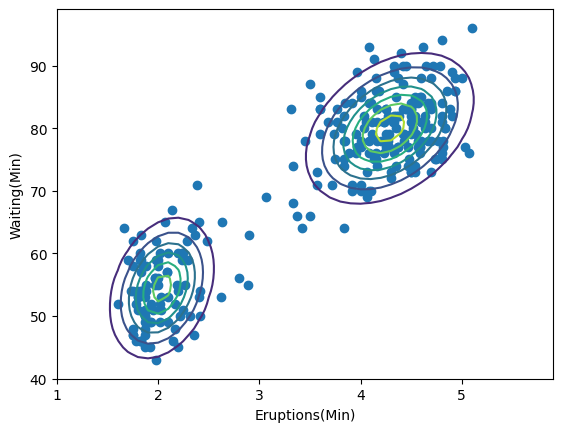

In [19]:
import matplotlib.pyplot as plt

def plot_contour(w, mus, covs):
    x = np.arange(1, 6, 0.1)
    y = np.arange(40, 100, 1)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            x = np.array([X[i, j], Y[i, j]])

            for k in range(len(mus)):
                mu, cov = mus[k], covs[k]
                Z[i, j] += w[k] * multivariate_normal(x, mu, cov)
    plt.contour(X, Y, Z)

plt.scatter(xs[:,0], xs[:,1])
plot_contour(phis, mus, covs)
plt.xlabel('Eruptions(Min)')
plt.ylabel('Waiting(Min)')
plt.show()

### データ生成

(272, 2)
(500, 2)


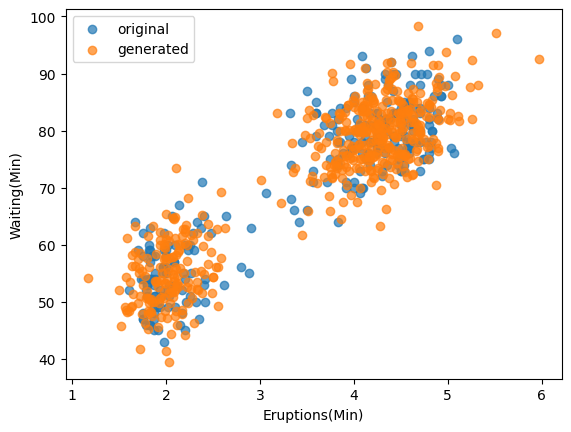

In [25]:
N = 500
new_xs = np.zeros((N, 2))
for n in range(N):
    k = np.random.choice(2, p=phis)
    mu, cov = mus[k], covs[k]
    new_xs[n] = np.random.multivariate_normal(mu, cov)

print(xs.shape)
print(new_xs.shape)
plt.scatter(xs[:,0], xs[:,1], alpha=0.7, label='original')
plt.scatter(new_xs[:,0], new_xs[:,1], alpha=0.7, label='generated')
plt.legend()
plt.xlabel('Eruptions(Min)')
plt.ylabel('Waiting(Min)')
plt.show()